## Products Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Read the products dataset
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [3]:
# Check the data shape and info
print('products data shape: ', products.shape)
print(products.info())
print("---------------------------------------------------------------")
print(products.describe(include='all').transpose())

products data shape:  (845552, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
None
---------------------------------------------------------------
                 count unique                       top    freq  \
CATEGORY_1      845441     27         Health & Wellness  512695   
CATEGORY_2      844128    121                     Candy  121036   
CATEGORY_3      784986    344          Confection Candy   56965   
CATEGORY_4       67459    127                 Lip Balms    9737   
MANUFACTURER    619078   4354  PLACEH

In [4]:
# Data types transforming: BARCODE columns
products["BARCODE"] = products["BARCODE"].astype(str)

# Clean the BARCODE column's format
products["BARCODE"] = products["BARCODE"].str.replace(".0", "")
products["BARCODE"] = products["BARCODE"].replace("nan", np.nan)

In [5]:
# Check duplicates
print("duplicates counts: ", products.duplicated().sum())
products[products.duplicated(keep=False)].sort_values(by="BARCODE")

duplicates counts:  215


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
284352,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES,11461821
813383,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES,11461821
747987,Snacks,Pretzels,Covered Pretzels,NaN,CREATIVE DESIGN,WONDERSHOP,11825364
434164,Snacks,Pretzels,Covered Pretzels,NaN,CREATIVE DESIGN,WONDERSHOP,11825364
265661,Snacks,Nuts & Seeds,Mixed Nuts,NaN,GHIRARDELLI CHOCOLATE COMPANY,GHIRARDELLI,13468439
...,...,...,...,...,...,...,...
788418,Restaurant,Beverages,Soda,NaN,THE COCA-COLA COMPANY,COCA-COLA,NaN
800841,Restaurant,Beverages,Soda,NaN,THE COCA-COLA COMPANY,COCA-COLA,NaN
806529,Restaurant,Beverages,Soda,NaN,THE COCA-COLA COMPANY,COCA-COLA,NaN
812803,Snacks,Crackers,Cheese Crackers,NaN,CAMPBELL SOUP COMPANY,GOLDFISH,NaN


In [6]:
# Remove duplicated rows
products.drop_duplicates(inplace=True)
products.shape 

(845337, 7)

In [7]:
# Check the missing data and % population of each column
products_stats = pd.DataFrame(products.count(), columns=['count'])
products_stats['missing'] = products.isnull().sum()
products_stats['% pop'] = 1 - products_stats['missing'] / products.shape[0]
products_stats

,count,missing,% pop
CATEGORY_1,845226,111,0.999869
CATEGORY_2,843915,1422,0.998318
CATEGORY_3,784774,60563,0.928356
CATEGORY_4,67453,777884,0.079794
MANUFACTURER,618873,226464,0.732102
BRAND,618875,226462,0.732104
BARCODE,841369,3968,0.995306


In [8]:
products_stats["missing"]/(products_stats["missing"] + products_stats["count"]) * 100

CATEGORY_1       0.013131
CATEGORY_2       0.168217
CATEGORY_3       7.164362
CATEGORY_4      92.020579
MANUFACTURER    26.789789
BRAND           26.789553
BARCODE          0.469399
dtype: float64

The Products dataframe contains duplicated rows, which do not provide any additional useful information and may cause issues when merging with other dataframes. Therefore, I recommend removing these duplicated rows.

Additionally, all columns contain missing values, with the following percentages of missing data in each column:

- `CATEGORY_1`: 0.01% missing values
- `CATEGORY_2`: 0.2% missing values
- `CATEGORY_3`: 7.2% missing values
- `CATEGORY_4`: 92.0% missing values
- `MANUFACTURER`: 26.8% missing values
- `BRAND`: 26.8% missing values
- `BARCODE`: 0.5% missing values

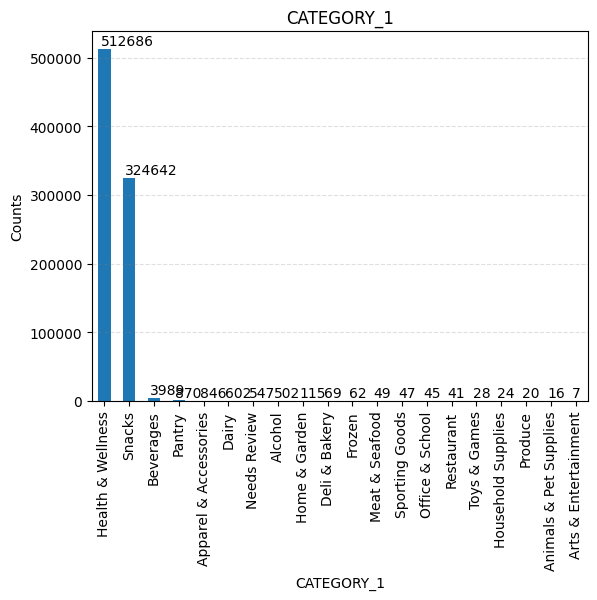

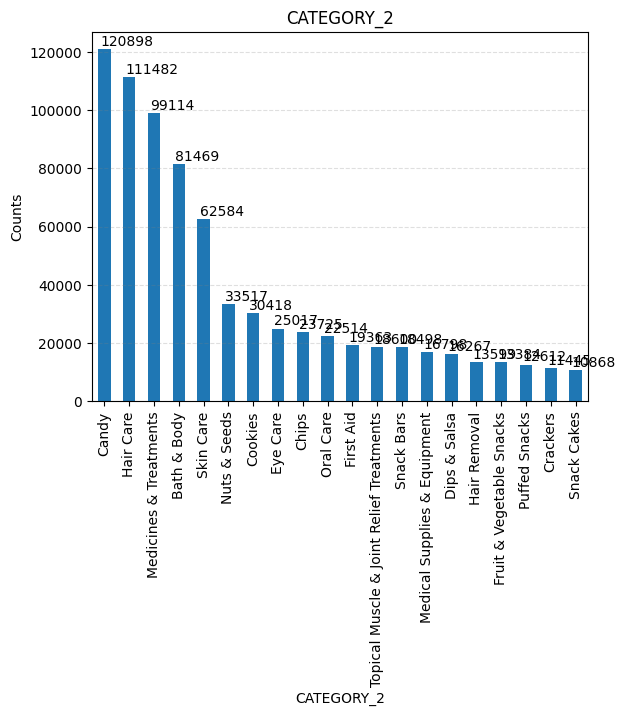

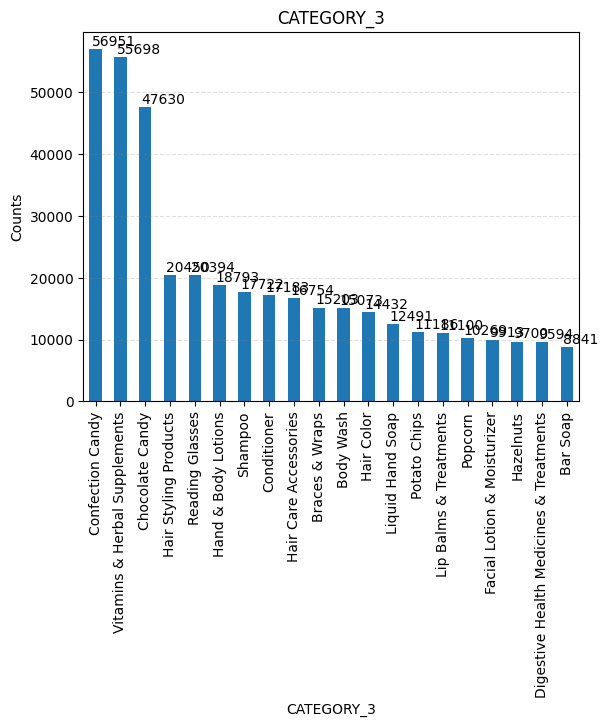

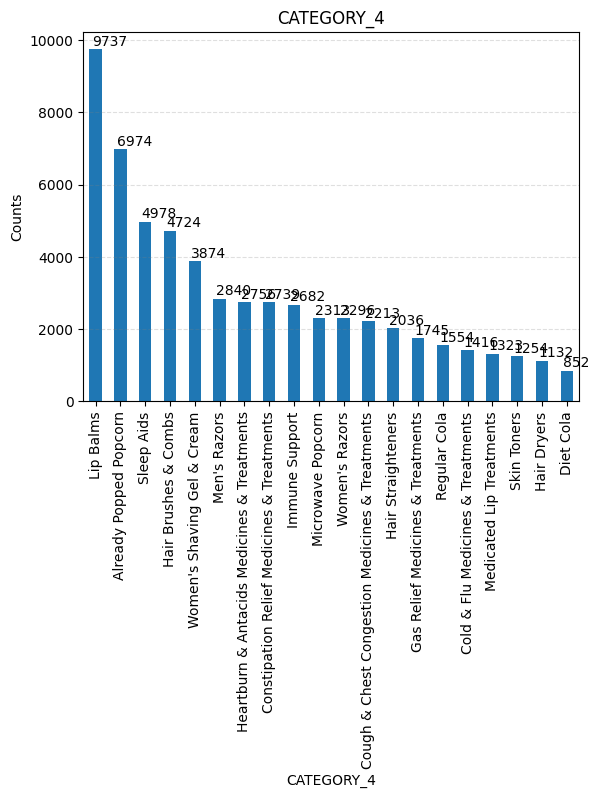

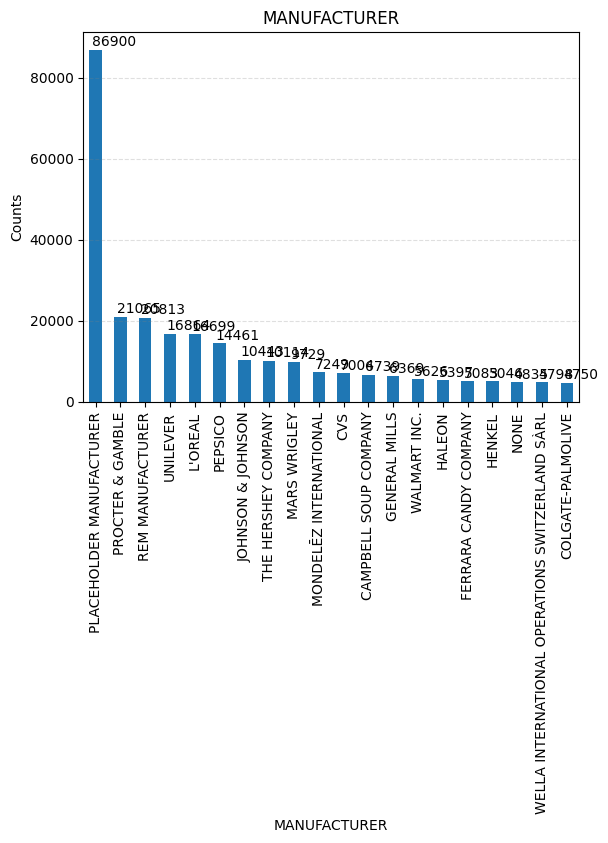

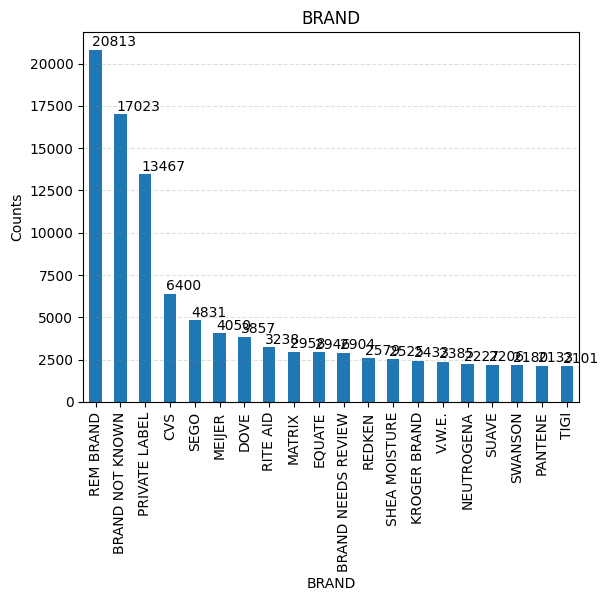

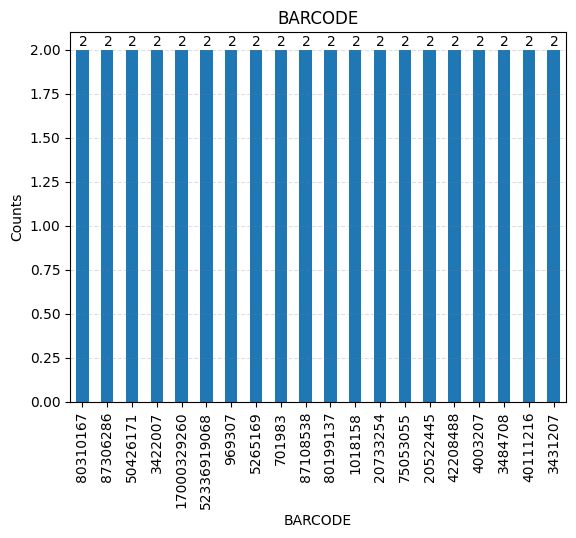

In [9]:
# plot categorical histograms
for col in products.columns:
    counts = products[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    for i, v in enumerate(counts):
        ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

The `BARCODE` column still contains duplicated values, which appears to be unusual. According to the Entity Relationship Model, each product should have a unique barcode. I will conduct a further investigation to understand the cause.

### `BARCODE` column

In [10]:
# Check the BARCODE column distribution
print(products["BARCODE"].describe())
products["BARCODE"].value_counts(dropna=False)

count       841369
unique      841342
top       80310167
freq             2
Name: BARCODE, dtype: object


BARCODE
NaN             3968
20733056           2
50426171           2
3473009            2
3422007            2
                ... 
719283837301       1
43427192323        1
700712050095       1
18169482254        1
796793337781       1
Name: count, Length: 841343, dtype: int64

In [11]:
# Look into the duplicated barcodes except nan
duplicated_barcode = products[(products["BARCODE"].notna())&(products["BARCODE"].duplicated(keep=False))].sort_values("BARCODE")
print("Duplicates counts: ", duplicated_barcode.shape)
duplicated_barcode.head()

Duplicates counts:  (54, 7)


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
428256,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,NaN,"R.M. PALMER COMPANY, LLC",PALMER,1018158
123194,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,17000329260
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,17000329260
783021,Snacks,Cookies,NaN,NaN,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,20031077


In [12]:
# Save the list for future use
duplicated_barcode_list = duplicated_barcode["BARCODE"].unique()

There are 27 (54/2) duplicated `BARCODE` entries in the Products dataset. These duplicates have different values in other columns, requiring further decision-making on how to handle them. It is recommended to verify the data source to understand the reason behind these duplicates and determine the appropriate course of action.

In [13]:
products["CATEGORY_1"].value_counts(dropna=False)

CATEGORY_1
Health & Wellness         512686
Snacks                    324642
Beverages                   3989
Pantry                       870
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      502
Home & Garden                115
NaN                          111
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Restaurant                    41
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

In [14]:
# calculate the frequency of each level in the column
freq_cat1 = 100*(products["CATEGORY_1"].value_counts(dropna=False)/len(products["CATEGORY_1"]))
print(freq_cat1.map("{:.2f}%".format))

CATEGORY_1
Health & Wellness         60.65%
Snacks                    38.40%
Beverages                  0.47%
Pantry                     0.10%
Apparel & Accessories      0.10%
Dairy                      0.07%
Needs Review               0.06%
Alcohol                    0.06%
Home & Garden              0.01%
NaN                        0.01%
Deli & Bakery              0.01%
Frozen                     0.01%
Meat & Seafood             0.01%
Sporting Goods             0.01%
Office & School            0.01%
Restaurant                 0.00%
Toys & Games               0.00%
Household Supplies         0.00%
Produce                    0.00%
Animals & Pet Supplies     0.00%
Arts & Entertainment       0.00%
Electronics                0.00%
Mature                     0.00%
Vehicles & Parts           0.00%
Baby & Toddler             0.00%
Beauty                     0.00%
Media                      0.00%
Luggage & Bags             0.00%
Name: count, dtype: object


The dataset shows a dominant category_1 of 'Health & Wellness' and 'Snacks', which may introduce bias and affect the validity of future analyses. Further decision-making is needed on how to address this bias.

In [15]:
products["CATEGORY_2"].value_counts(dropna=False)

CATEGORY_2
Candy                      120898
Hair Care                  111482
Medicines & Treatments      99114
Bath & Body                 81469
Skin Care                   62584
                            ...  
Games                           1
Vehicle Storage & Cargo         1
Audio                           1
Pasta & Noodles                 1
Baby Transport                  1
Name: count, Length: 122, dtype: int64

In [16]:
# calculate the frequency of each level in the column
freq_cat2 = 100*(products["CATEGORY_2"].value_counts(dropna=False)/len(products["CATEGORY_2"]))
print(freq_cat2.map("{:.2f}%".format))

CATEGORY_2
Candy                      14.30%
Hair Care                  13.19%
Medicines & Treatments     11.72%
Bath & Body                 9.64%
Skin Care                   7.40%
                            ...  
Games                       0.00%
Vehicle Storage & Cargo     0.00%
Audio                       0.00%
Pasta & Noodles             0.00%
Baby Transport              0.00%
Name: count, Length: 122, dtype: object


In [17]:
products["CATEGORY_3"].value_counts(dropna=False)

CATEGORY_3
NaN                              60563
Confection Candy                 56951
Vitamins & Herbal Supplements    55698
Chocolate Candy                  47630
Hair Styling Products            20450
                                 ...  
Outdoor Living                       1
Fuel Containers & Tanks              1
Beans                                1
Chair & Sofa Cushions                1
Baby Carriers                        1
Name: count, Length: 345, dtype: int64

In [18]:
# calculate the frequency of each level in the column
freq_cat3 = 100*(products["CATEGORY_3"].value_counts(dropna=False)/len(products["CATEGORY_3"]))
print(freq_cat3.map("{:.2f}%".format))

CATEGORY_3
NaN                              7.16%
Confection Candy                 6.74%
Vitamins & Herbal Supplements    6.59%
Chocolate Candy                  5.63%
Hair Styling Products            2.42%
                                 ...  
Outdoor Living                   0.00%
Fuel Containers & Tanks          0.00%
Beans                            0.00%
Chair & Sofa Cushions            0.00%
Baby Carriers                    0.00%
Name: count, Length: 345, dtype: object


In [19]:
products["CATEGORY_4"].value_counts(dropna=False)

CATEGORY_4
NaN                       777884
Lip Balms                   9737
Already Popped Popcorn      6974
Sleep Aids                  4978
Hair Brushes & Combs        4724
                           ...  
Sherbet                        1
Coconut Milk                   1
Corn Syrup                     1
White Merlot                   1
Spices                         1
Name: count, Length: 128, dtype: int64

In [20]:
# calculate the frequency of each level in the column
freq_cat4 = 100*(products["CATEGORY_4"].value_counts(dropna=False)/len(products["CATEGORY_4"]))
print(freq_cat4.map("{:.2f}%".format))

CATEGORY_4
NaN                       92.02%
Lip Balms                  1.15%
Already Popped Popcorn     0.82%
Sleep Aids                 0.59%
Hair Brushes & Combs       0.56%
                           ...  
Sherbet                    0.00%
Coconut Milk               0.00%
Corn Syrup                 0.00%
White Merlot               0.00%
Spices                     0.00%
Name: count, Length: 128, dtype: object


In [21]:
products["MANUFACTURER"].value_counts(dropna=False)

MANUFACTURER
NaN                                  226464
PLACEHOLDER MANUFACTURER              86900
PROCTER & GAMBLE                      21065
REM MANUFACTURER                      20813
UNILEVER                              16864
                                      ...  
WHITEBRIDGE PET BRANDS                    1
G FABBRI SPA                              1
KOON CHUN HING KEE SOY SC                 1
SPRECHER BREWING COMPANY, LLC             1
OUTDOOR PRODUCT INNOVATIONS, INC.         1
Name: count, Length: 4355, dtype: int64

In [22]:
# calculate the frequency of each level in the column
freq_manu = 100*(products["MANUFACTURER"].value_counts(dropna=False)/len(products["MANUFACTURER"]))
print(freq_manu.map("{:.2f}%".format))

MANUFACTURER
NaN                                  26.79%
PLACEHOLDER MANUFACTURER             10.28%
PROCTER & GAMBLE                      2.49%
REM MANUFACTURER                      2.46%
UNILEVER                              1.99%
                                      ...  
WHITEBRIDGE PET BRANDS                0.00%
G FABBRI SPA                          0.00%
KOON CHUN HING KEE SOY SC             0.00%
SPRECHER BREWING COMPANY, LLC         0.00%
OUTDOOR PRODUCT INNOVATIONS, INC.     0.00%
Name: count, Length: 4355, dtype: object


The second most common `MANUFACTURER` is "PLACEHOLDER MANUFACTURER", which may indicate missing data or placeholder values. This needs further clarification from the data provider. **It is recommended to replace these placeholder values with NaNs to avoid any potential issues in the analysis.**

In [23]:
products["BRAND"].value_counts(dropna=False).head(20)

BRAND
NaN                   226462
REM BRAND              20813
BRAND NOT KNOWN        17023
PRIVATE LABEL          13467
CVS                     6400
SEGO                    4831
MEIJER                  4050
DOVE                    3857
RITE AID                3238
MATRIX                  2958
EQUATE                  2946
BRAND NEEDS REVIEW      2904
REDKEN                  2579
SHEA MOISTURE           2525
KROGER BRAND            2433
V.W.E.                  2385
NEUTROGENA              2227
SUAVE                   2206
SWANSON                 2180
PANTENE                 2133
Name: count, dtype: int64

In [24]:
# calculate the frequency of each level in the column
freq_brand = 100*(products["BRAND"].value_counts(dropna=False)/len(products["BRAND"])).head(20)
print(freq_brand.map("{:.2f}%".format))

BRAND
NaN                   26.79%
REM BRAND              2.46%
BRAND NOT KNOWN        2.01%
PRIVATE LABEL          1.59%
CVS                    0.76%
SEGO                   0.57%
MEIJER                 0.48%
DOVE                   0.46%
RITE AID               0.38%
MATRIX                 0.35%
EQUATE                 0.35%
BRAND NEEDS REVIEW     0.34%
REDKEN                 0.31%
SHEA MOISTURE          0.30%
KROGER BRAND           0.29%
V.W.E.                 0.28%
NEUTROGENA             0.26%
SUAVE                  0.26%
SWANSON                0.26%
PANTENE                0.25%
Name: count, dtype: object


The third most common `BRAND` is "BRAND NOT KNOWN", which may indicate missing data. This needs further clarification from the data provider. **It is recommended to replace these values with NaNs to avoid any potential issues in the analysis.**

In addition, there are 2904 (0.34%) "BRAND NEEDS REVIEW" entries, which may need further data manipulation or investigation.

## In conclusion, the major data quality issues identified are as follows:

1. Approximately 400 duplicated rows, which may cause issues when merging with other dataframes: It is recommended to remove these duplicates.

2. Missing values in all columns, especially in `CATEGORY_4` (92%), `MANUFACTURER` (26.8%), and `BRAND` (26.8%), with `BARCODE` (0.5%) being critical as the product identifier: Further discussion is needed on how to handle these missing values.

3. 27 duplicated `BARCODE` entries with different values in other columns: Further decision-making is required to determine how to handle these duplicates.

4. Dominant categories of 'Health & Wellness' (60.7%) and 'Snacks' (38.4%) in `CATEGORY_1`, which may introduce bias: Further decision-making is needed on how to address this bias.

5. The second most common `MANUFACTURER` is "PLACEHOLDER MANUFACTURER" (10.3%), indicating potential missing data or placeholder values: It is recommended to replace these values with NaNs

6. The third most common `BRAND` is "BRAND NOT KNOWN" (2%), and there are 2,904 (0.34%) "BRAND NEEDS REVIEW" entries, indicating potential missing data: It is recommended to replace these values with NaNs

----

#### Checking if I don't do data cleaning on duplicated BARCODE at this stage, what will be the impact on the analysis?

In [25]:
# Load all original datasets
users = pd.read_csv('USER_TAKEHOME.csv')
products = pd.read_csv('PRODUCTS_TAKEHOME.csv')
trans = pd.read_csv('TRANSACTION_TAKEHOME.csv')

In [26]:
# Remove the nan barcode rows
products = products[products["BARCODE"].notna()]
trans = trans[trans["BARCODE"].notna()]

In [27]:
# Data types transforming: BARCODE columns
products["BARCODE"] = products["BARCODE"].astype(str)

# Clean the BARCODE column's format
products["BARCODE"] = products["BARCODE"].str.replace(".0", "")
products["BARCODE"] = products["BARCODE"].replace("nan", np.nan)

In [28]:
# Data types transforming: BARCODE columns
trans["BARCODE"] = trans["BARCODE"].astype(str)

# Clean the BARCODE column's format
trans["BARCODE"] = trans["BARCODE"].str.replace(".0", "")
trans["BARCODE"] = trans["BARCODE"].replace("nan", np.nan)

In [29]:
# Merge users and transactions datasets
df = pd.merge(users, trans, left_on="ID", right_on="USER_ID", how="inner")
df.shape

(238, 14)

In [30]:
# Merge the products dataset
df = pd.merge(df, products, on="BARCODE", how="inner")
df.shape

(144, 20)

In [31]:
df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,62c303aebaa38d1a1f6d0d51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00.000 Z,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62c303aebaa38d1a1f6d0d51,78742222349,1.00,,Snacks,Snack Cakes,Donut Snack Cakes,NaN,WALMART INC.,FRESHNESS GUARANTEED
1,62c303aebaa38d1a1f6d0d51,2022-07-04 15:13:50.000 Z,1958-09-27 00:00:00.000 Z,FL,en,female,cdcc0ef0-9f72-45d4-aecf-701ce553f792,2024-06-12,2024-06-16 10:00:31.951 Z,WALMART,62c303aebaa38d1a1f6d0d51,78742222349,1.00,3.24,Snacks,Snack Cakes,Donut Snack Cakes,NaN,WALMART INC.,FRESHNESS GUARANTEED
2,5fd4fb485f410d44bae3a776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00.000 Z,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5fd4fb485f410d44bae3a776,22400643366,2.00,,Health & Wellness,Hair Care,Hair Styling Products,NaN,UNILEVER,TRESEMMÉ
3,5fd4fb485f410d44bae3a776,2020-12-12 17:18:00.000 Z,1979-01-23 00:00:00.000 Z,CA,es-419,female,3c6b21b7-4f9e-4316-98e5-8842c5491871,2024-08-30,2024-09-03 12:35:17.267 Z,TARGET,5fd4fb485f410d44bae3a776,22400643366,2.00,14.58,Health & Wellness,Hair Care,Hair Styling Products,NaN,UNILEVER,TRESEMMÉ
4,5b441360be53340f289b0795,2018-07-10 02:01:04.000 Z,1982-09-27 06:00:00.000 Z,IL,en,female,a7e6adf6-3dac-497f-90f1-7f371c639a1f,2024-07-22,2024-07-22 09:49:41.406 Z,TARGET,5b441360be53340f289b0795,2700717433990,zero,7.99,Health & Wellness,Bath & Body,Body Wash,NaN,UNILEVER,AXE


In [32]:
# The barcode list that has same barcode but different values in other columns
duplicated_barcode_list

array(['1018158', '17000329260', '20031077', '20159078', '20522445',
       '20733056', '20733254', '3422007', '3431207', '3454503', '3473009',
       '3484708', '360054002', '4003207', '40111216', '404310',
       '42208488', '50426171', '52336919068', '5265169', '701983',
       '75053055', '80199137', '80310167', '87108538', '87306286',
       '969307'], dtype=object)

In [33]:
# Check if the merged dataset contains those questionable barcodes
df[df["BARCODE"].isin(duplicated_barcode_list)]

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND


In [34]:
# The duplicated rows in products dataset
duplicated_rows = products[products.duplicated(keep=False)].sort_values(by="BARCODE")
duplicated_rows

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
284352,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES,11461821
813383,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES,11461821
747987,Snacks,Pretzels,Covered Pretzels,NaN,CREATIVE DESIGN,WONDERSHOP,11825364
434164,Snacks,Pretzels,Covered Pretzels,NaN,CREATIVE DESIGN,WONDERSHOP,11825364
265661,Snacks,Nuts & Seeds,Mixed Nuts,NaN,GHIRARDELLI CHOCOLATE COMPANY,GHIRARDELLI,13468439
...,...,...,...,...,...,...,...
538493,Snacks,Candy,Gum,NaN,PERFETTI VAN MELLE,MENTOS,87317527
325056,Snacks,Dips & Salsa,Hummus,NaN,TRADER JOE'S,TRADER JOE'S,906425
368833,Snacks,Dips & Salsa,Hummus,NaN,TRADER JOE'S,TRADER JOE'S,906425
87568,Snacks,Chips,Crisps,NaN,TRADER JOE'S,TRADER JOE'S,952811


In [35]:
# Check if the merged dataset contains those questionable barcodes
df[df["BARCODE"].isin(list(duplicated_rows["BARCODE"]))]

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND


Since the merged data does not contain those questionable BARCODEs, the impact on the second analysis will be minimal. I will not do further data cleaning after hearing feedback from the data provider.